**Phishing is a type of semantic attack, often used to steal user sensitive information including login credentials and
credit card numbers.5-7 It occurs when an attacker, masquerading as a trusted entity, entice a victim into clicking on a link
 or opening an attachment in an email or instant message through social messaging services such as WhatsApp, Viber or Facebook Messenger.
The data that we have below is representing the URL features.**

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
phishing = pd.read_csv("Phishing.csv")
phishing.head(5)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
phishing = phishing.drop(['id'], axis = 1)

# last column depicts what we are trying to predict, if the website is a phishing site or not.

In [5]:
phishing.shape

(10000, 49)

# But before moving forward, can somebody realize what problems will arise due to such a dimensional data?
# Would you fill a form or provide 50 such information just to see if the site is a phishing site or not?

In [6]:
phishing.isnull().sum()

NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0
NumSensitiveWords                     0


In [7]:
# This dataset contains 48 features extracted from 5000 phishing webpages and 5000 legitimate webpages.

phishing.describe()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,0.073800,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,0.622248,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,19.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Classes to predict from.

phishing['CLASS_LABEL'].value_counts()

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64

In [9]:
# Finding more from the data

phishing_class = phishing.groupby('CLASS_LABEL')
phishing_class['NoHttps'].value_counts()

CLASS_LABEL  NoHttps
0            1          4982
             0            18
1            1          4906
             0            94
Name: count, dtype: int64

In [10]:
phishing_class['UrlLength'].mean()

CLASS_LABEL
0    72.7498
1    67.7784
Name: UrlLength, dtype: float64

In [11]:
phishing_class['NumPercent'].mean()

CLASS_LABEL
0    0.1164
1    0.0312
Name: NumPercent, dtype: float64

In [12]:
phishing_class['NumAmpersand'].mean()

CLASS_LABEL
0    0.3682
1    0.1862
Name: NumAmpersand, dtype: float64

In [13]:
phishing_class['NumHash'].mean()

CLASS_LABEL
0    0.0000
1    0.0046
Name: NumHash, dtype: float64

In [14]:
phishing_class['IpAddress'].value_counts()

CLASS_LABEL  IpAddress
0            0            5000
1            0            4828
             1             172
Name: count, dtype: int64

C:\Users\TRIMOYEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\TRIMOYEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\TRIMOYEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\TRIMOYEE\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

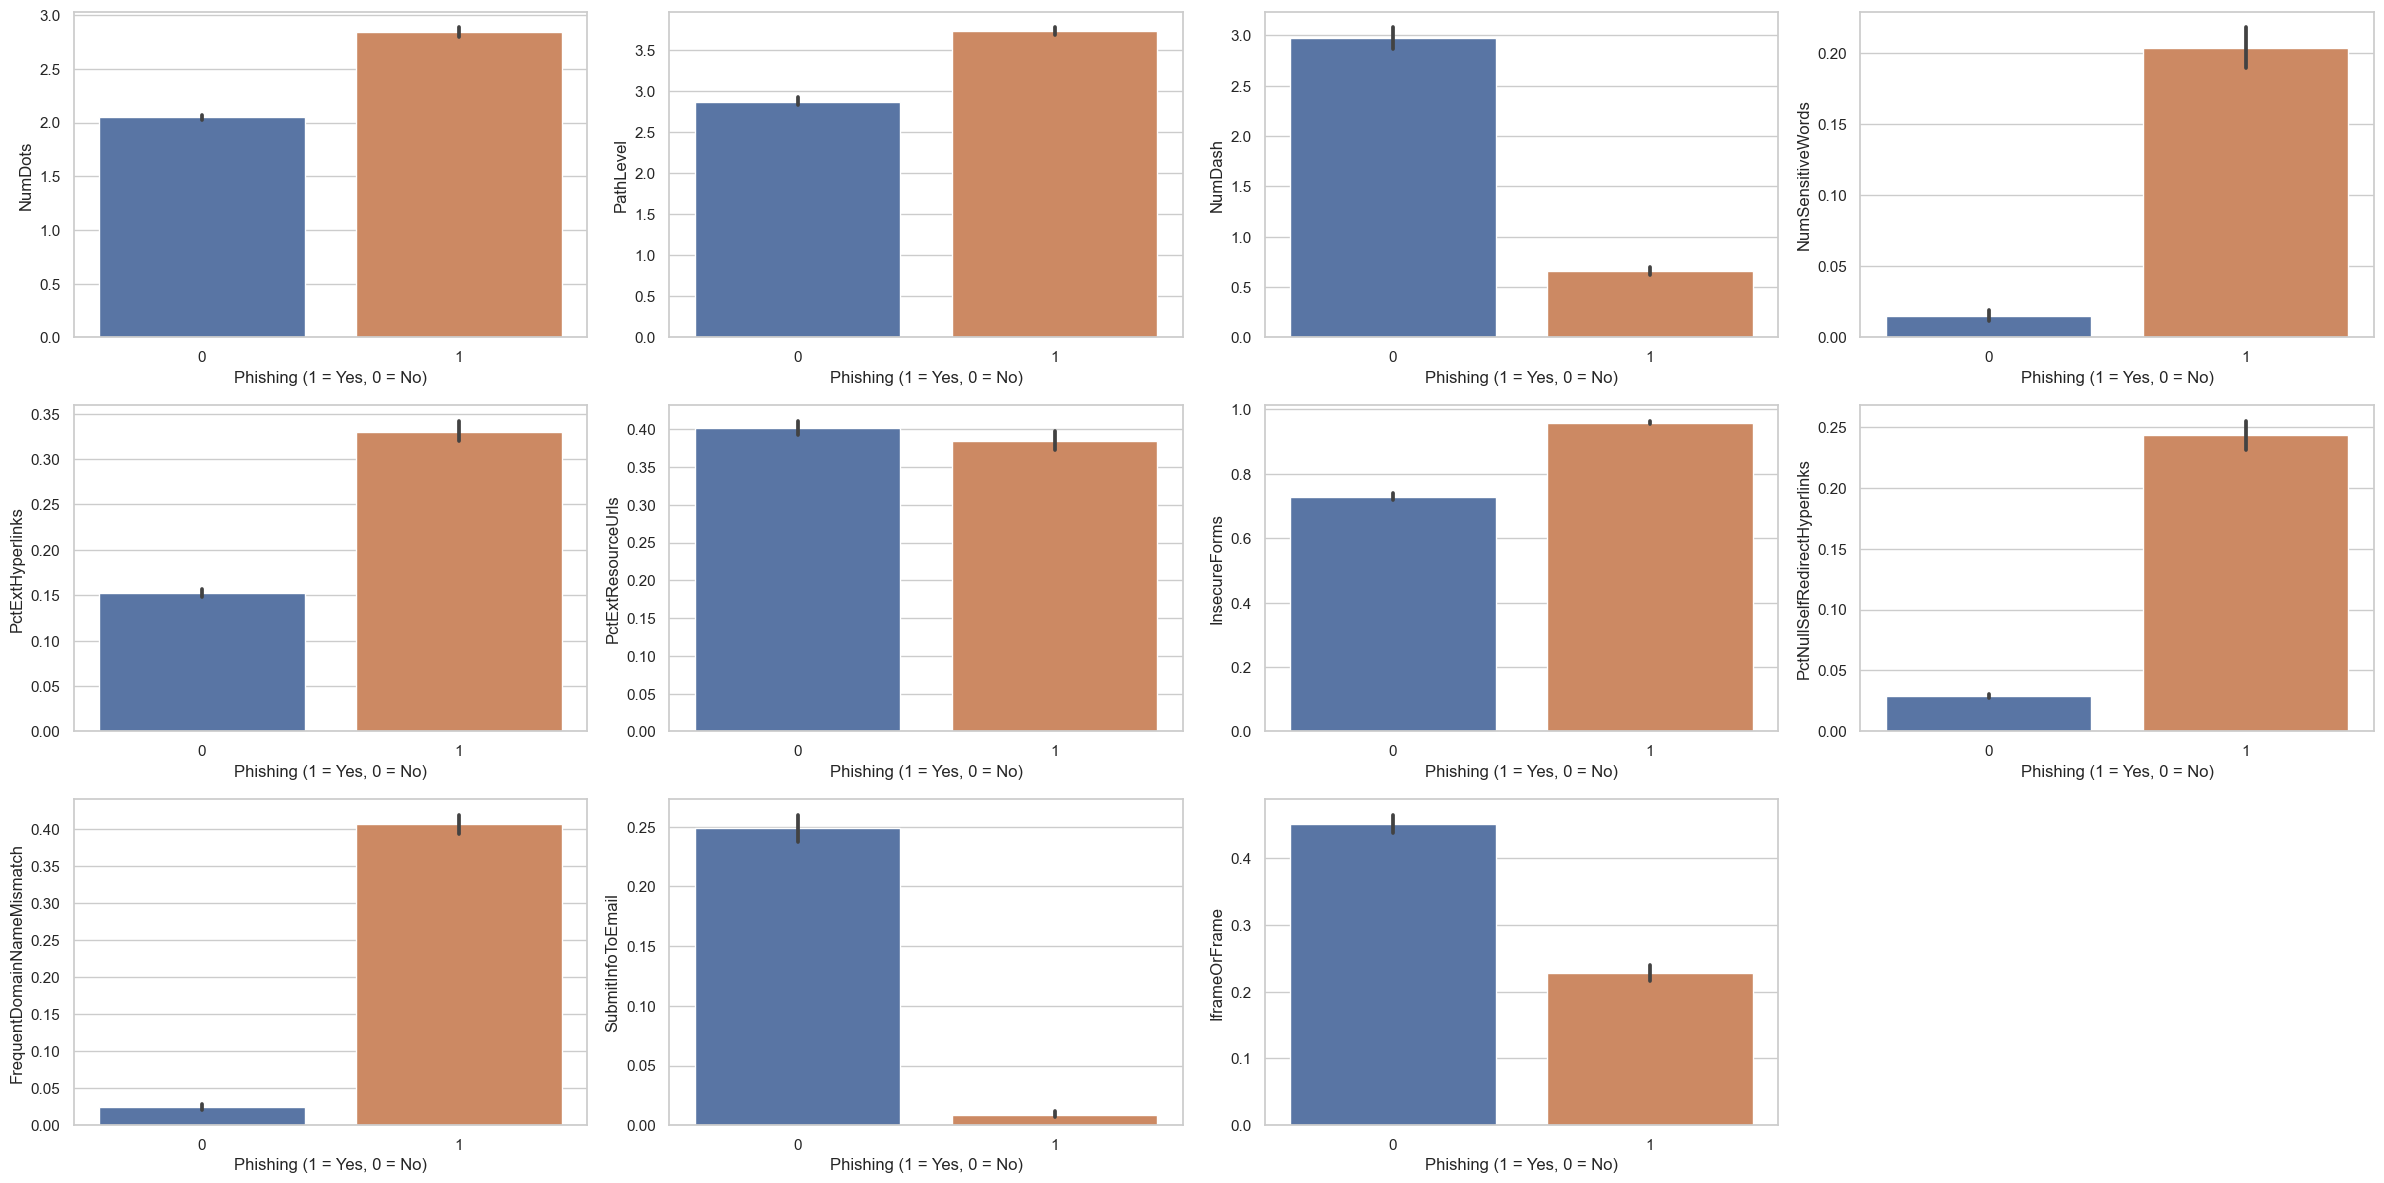

In [15]:
sns.set(style="whitegrid")

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(24, 12))

# Flatten the 2D array of axes for easy iteration
axes = axes.flatten()

# List of Y columns
y_columns = ["NumDots", "PathLevel", "NumDash", "NumSensitiveWords", "PctExtHyperlinks", "PctExtResourceUrls", "InsecureForms", 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'SubmitInfoToEmail', 'IframeOrFrame']

# Use Seaborn to create bar plots in each subplot for different Y values
for i in range(len(axes)):
    if i < len(y_columns):  # Check if index is within the range of y_columns
        sns.barplot(x="CLASS_LABEL", y=y_columns[i], data=phishing, ax=axes[i], capsize=0)
        axes[i].set_xlabel("Phishing (1 = Yes, 0 = No)")
        axes[i].set_ylabel(f"{y_columns[i]}")  # Set ylabel to the actual column name
    else:
        axes[i].axis('off')  # Turn off extra subplots if there are more subplots than y_columns

    

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\TRIMOYEE\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

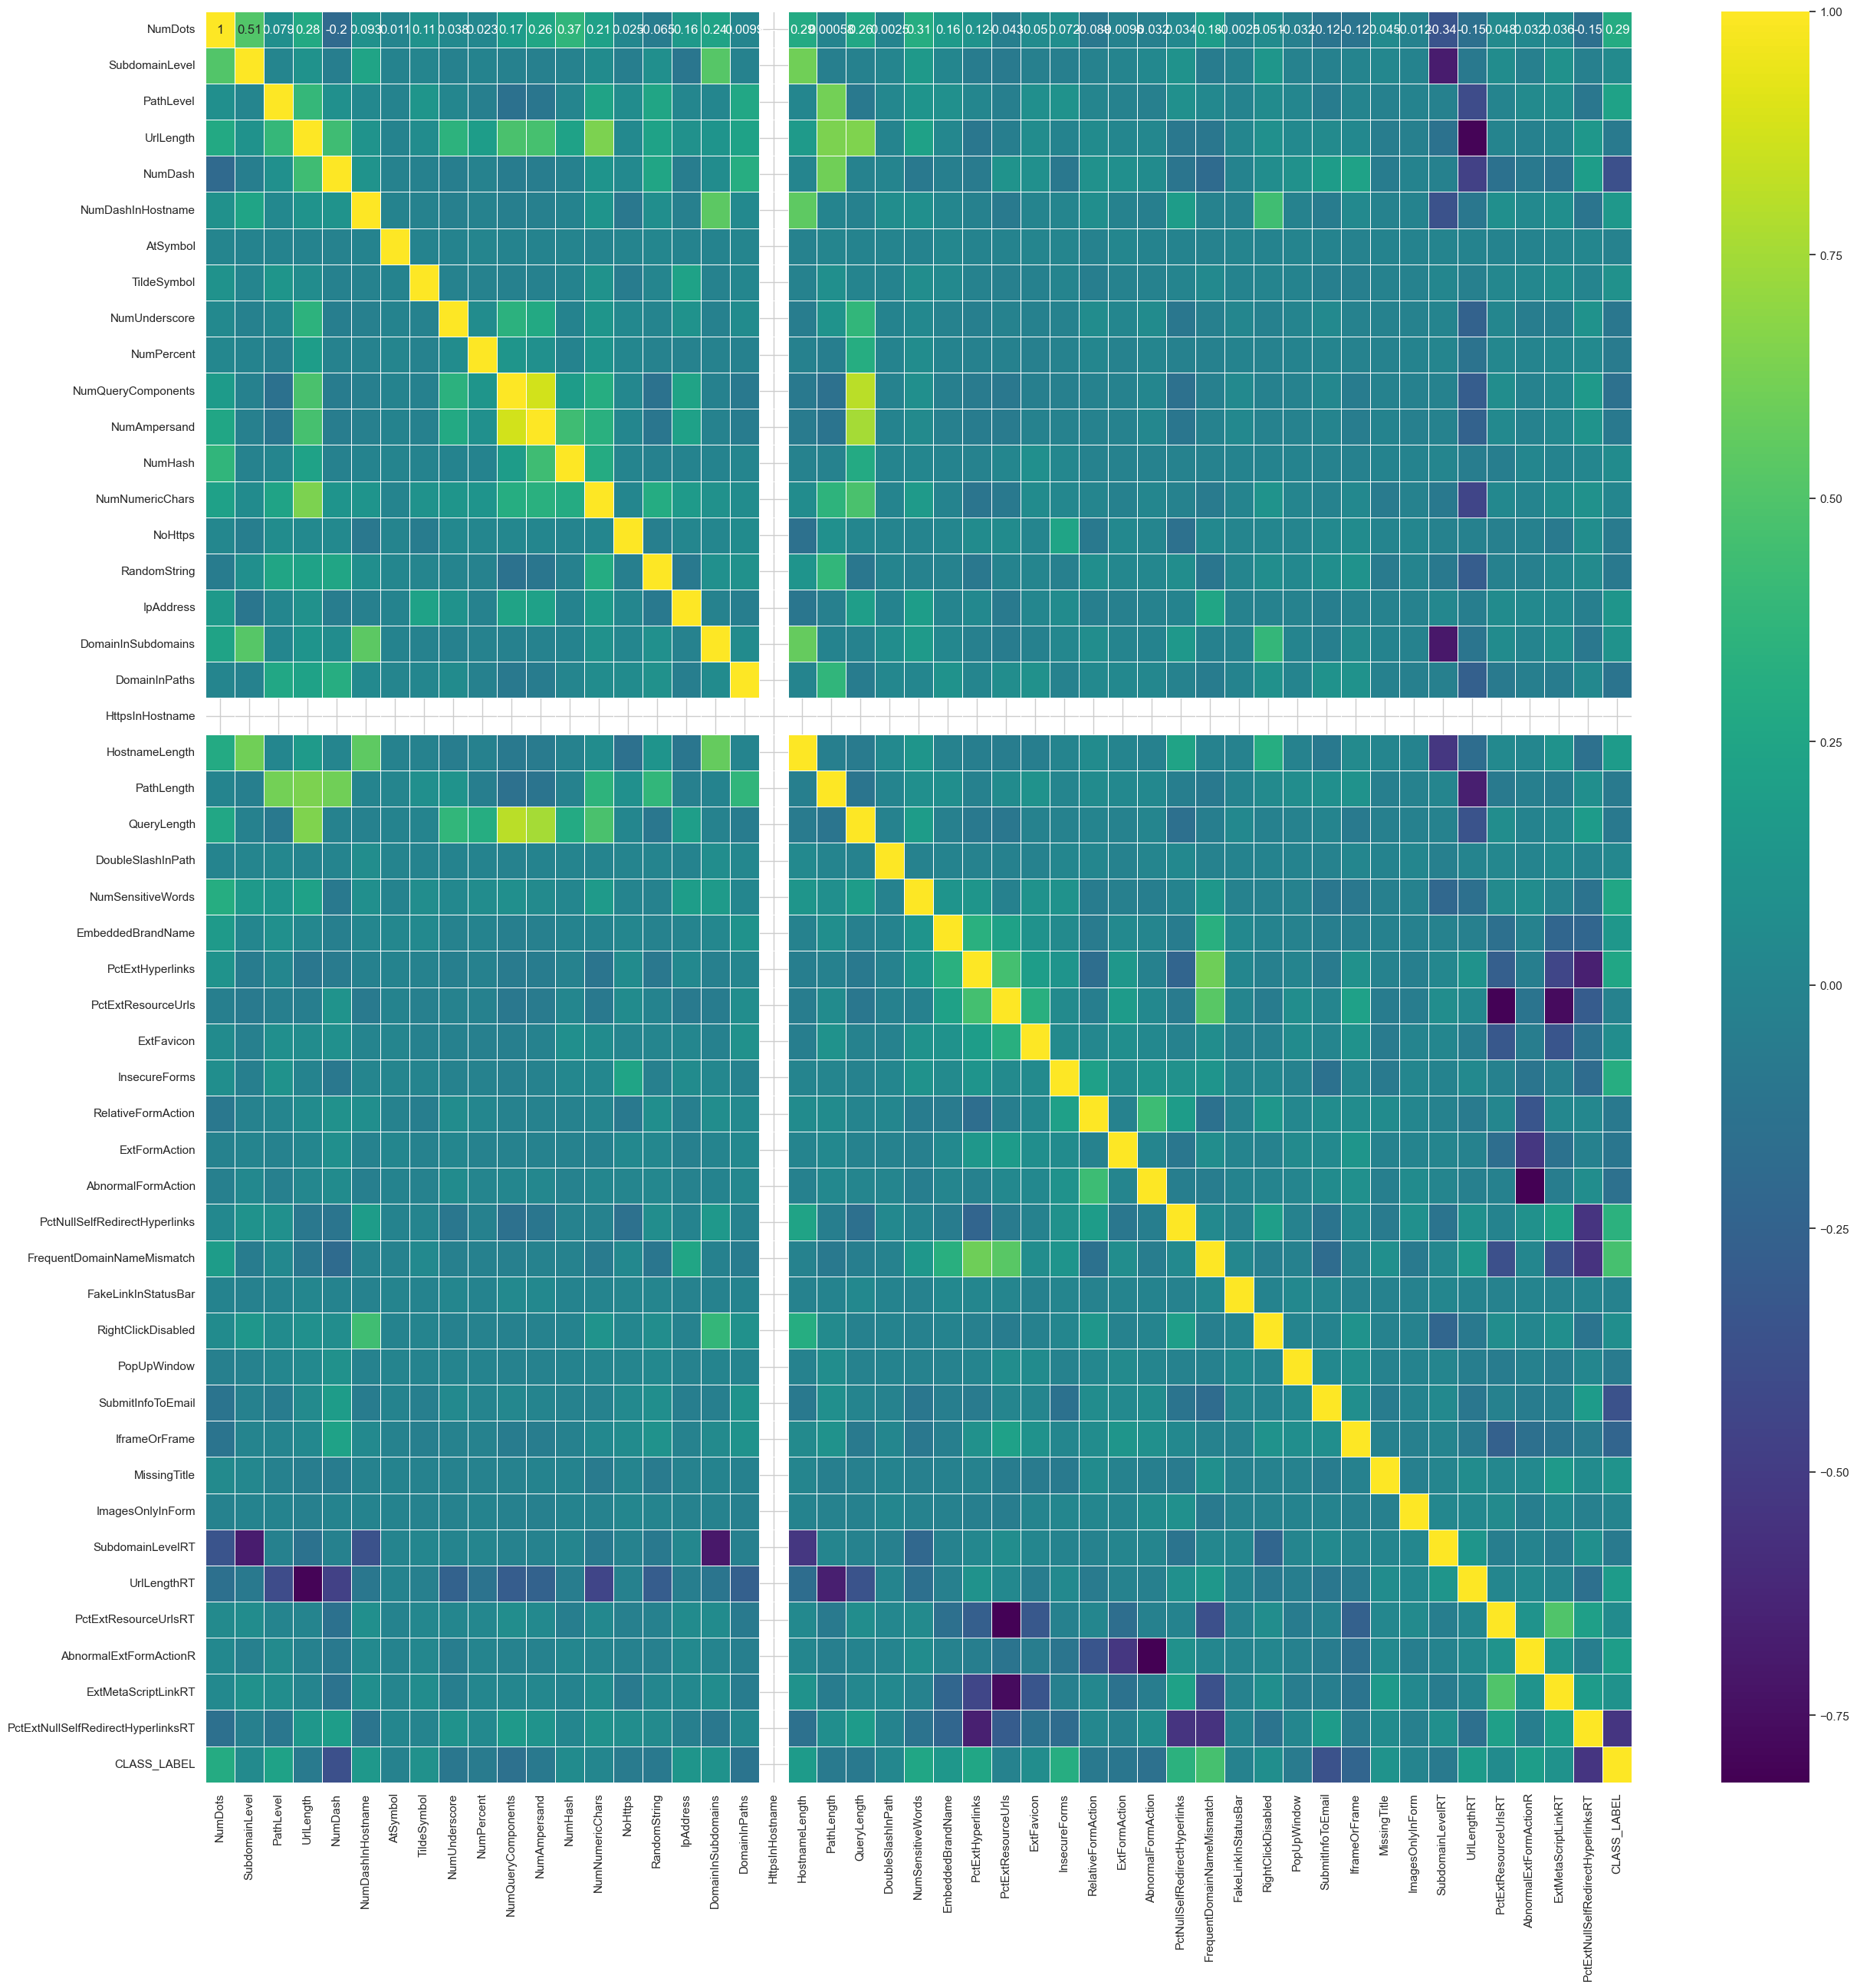

In [16]:
plt.figure(figsize=(30, 30))
sns.heatmap(phishing.corr(),annot=True,cmap='viridis',linewidths=.5)

In [17]:
phishing.columns

Index(['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperlinksRT

In [18]:
subset_phishing = phishing[['NumDots', 'PathLevel', 'NumDash', 'NumSensitiveWords', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'InsecureForms', 'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'SubmitInfoToEmail', 'IframeOrFrame', 'CLASS_LABEL']]

subset_phishing.head()       

,NumDots,PathLevel,NumDash,NumSensitiveWords,PctExtHyperlinks,PctExtResourceUrls,InsecureForms,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,CLASS_LABEL
0,3,5,0,0,0.000,0.250000,1,0.0,0,0,0,1
1,3,3,0,1,0.000,0.000000,1,0.0,0,0,0,1
2,3,2,0,0,0.375,1.000000,1,0.0,0,0,0,1
3,3,6,1,0,1.000,0.095238,1,0.0,1,1,0,1
4,3,4,0,0,1.000,1.000000,0,0.0,1,0,1,1


In [19]:
subset_phishing.shape

(10000, 12)

In [20]:
y = subset_phishing['CLASS_LABEL']
X = subset_phishing.drop(['CLASS_LABEL'], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state = 42)

In [23]:
random_model = RandomForestClassifier(n_estimators=250, n_jobs = -1)

In [26]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.81 %


In [27]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

97.8 %


In [27]:
# # Save the trained model as a pickle string.
# import pickle 

# saved_model = pickle.dump(random_model, open('drive/MyDrive/Dataset/Models/Phishing.pickle','wb'))